# Explore here

In [6]:
!pip install pandas numpy seaborn scikit-learn matplotlib
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

Defaulting to user installation because normal site-packages is not writeable


In [7]:
# --- Configuration for Reproducibility ---
RANDOM_STATE = 42
TEST_SIZE = 0.2

FILE_PATH = 'https://raw.githubusercontent.com/RozaSekouri/Boosting-Algorithms-Roza/main/data/processed/diabetes_processed.csv'

# Directories for saving models and plots
MODELS_DIR = 'models'
PLOTS_DIR = 'plots' # For plots from hyperparameter analysis

# Ensure directories exist
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(PLOTS_DIR, exist_ok=True)


print("Starting Boosting Algorithms Diabetes Prediction Project...\n")



Starting Boosting Algorithms Diabetes Prediction Project...



In [8]:
# --- Step 1: Loading the dataset ---
print("--- Step 1: Loading the dataset ---")

try:
    df_processed = pd.read_csv(FILE_PATH)

    # Assuming 'Outcome' is the target variable (0 for non-diabetic, 1 for diabetic)
    X = df_processed.drop('Outcome', axis=1)
    y = df_processed['Outcome']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
    )
    print("Dataset loaded and split successfully from GitHub URL.")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

except Exception as e:
    print(f"Error loading dataset from URL: {e}")
    print("Please ensure the URL is correct and the file is accessible.")
    exit()

# Display basic information about the loaded data for verification
print("\nX_train head:")
print(X_train.head())
print("\ny_train value counts:")
print(y_train.value_counts(normalize=True))


--- Step 1: Loading the dataset ---
Dataset loaded and split successfully from GitHub URL.
X_train shape: (614, 8), y_train shape: (614,)
X_test shape: (154, 8), y_test shape: (154,)

X_train head:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
353            1     90.0           62.0           12.0     43.0  27.2   
711            5    126.0           78.0           27.0     22.0  29.6   
373            2    105.0           58.0           40.0     94.0  34.9   
46             1    146.0           56.0           29.0    125.0  29.7   
682            0     95.0           64.0           39.0    105.0  44.6   

     DiabetesPedigreeFunction  Age  
353                     0.580   24  
711                     0.439   40  
373                     0.225   25  
46                      0.564   29  
682                     0.366   22  

y_train value counts:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64


In [9]:
# --- Step 2: Build a Boosting Model (GradientBoostingClassifier) ---
print("\n--- Step 2: Building and Optimizing a Boosting Model ---")

# --- 2a. Train a baseline Gradient Boosting model ---
print("\n2a. Training a Baseline Gradient Boosting Model:")
gb_baseline = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb_baseline.fit(X_train, y_train)

y_pred_gb_baseline = gb_baseline.predict(X_test)
accuracy_gb_baseline = accuracy_score(y_test, y_pred_gb_baseline)

print(f"Baseline Gradient Boosting Accuracy: {accuracy_gb_baseline:.4f}")
print("\nBaseline Classification Report:")
print(classification_report(y_test, y_pred_gb_baseline))
print("\nBaseline Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb_baseline))


--- Step 2: Building and Optimizing a Boosting Model ---

2a. Training a Baseline Gradient Boosting Model:
Baseline Gradient Boosting Accuracy: 0.7597

Baseline Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154


Baseline Confusion Matrix:
[[86 14]
 [23 31]]


In [10]:
# --- 2b. Hyperparameter Tuning for Gradient Boosting ---
print("\n2b. Hyperparameter Tuning for Gradient Boosting with GridSearchCV:")

# Define the parameter grid to search
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=RANDOM_STATE),
                              param_grid=param_grid_gb,
                              cv=5, # 5-fold cross-validation
                              n_jobs=-1, # Use all available CPU cores
                              scoring='accuracy', # Optimize for accuracy
                              verbose=2) # Verbose output to see progress

grid_search_gb.fit(X_train, y_train)

print(f"\nBest parameters found by GridSearchCV for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best cross-validation accuracy (GridSearchCV): {grid_search_gb.best_score_:.4f}")

# Get the best estimator from GridSearchCV
gb_best_model = grid_search_gb.best_estimator_

# Evaluate the best boosting model on the unseen test set
y_pred_gb_best = gb_best_model.predict(X_test)
final_accuracy_gb_best = accuracy_score(y_test, y_pred_gb_best)

print(f"\nFinal Gradient Boosting Accuracy on Test Set (with best GridSearchCV params): {final_accuracy_gb_best:.4f}")
print("\nFinal Classification Report (Best Gradient Boosting Model):")
print(classification_report(y_test, y_pred_gb_best))
print("\nFinal Confusion Matrix (Best Gradient Boosting Model):")
print(confusion_matrix(y_test, y_pred_gb_best))



2b. Hyperparameter Tuning for Gradient Boosting with GridSearchCV:
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0

# --- Plotting impact of key hyperparameters ---

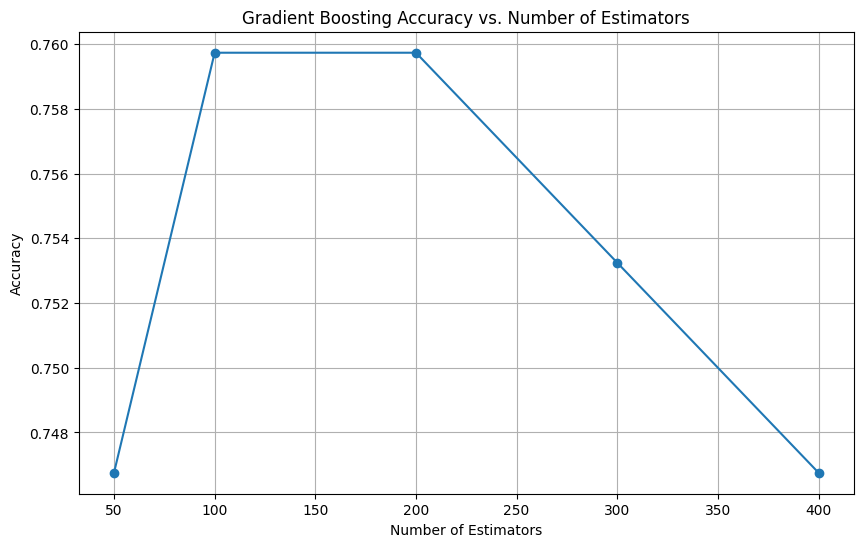

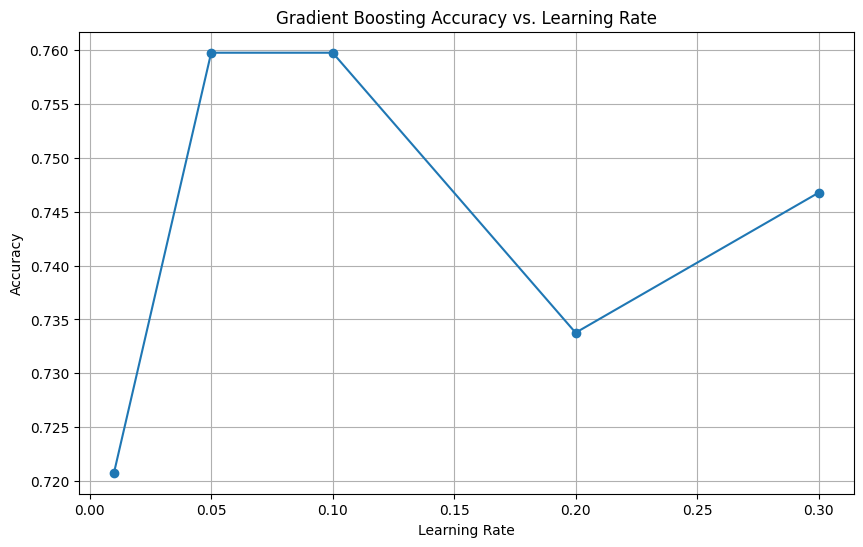

In [ ]:
# Example for n_estimators (assuming learning_rate=0.1, max_depth=3 for these tests)
n_estimators_values_plot = [50, 100, 200, 300, 400]
accuracy_n_estimators_gb = []
for n_est in n_estimators_values_plot:
    gb_temp = GradientBoostingClassifier(n_estimators=n_est, learning_rate=0.1, max_depth=3, random_state=RANDOM_STATE)
    gb_temp.fit(X_train, y_train)
    accuracy_n_estimators_gb.append(accuracy_score(y_test, gb_temp.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values_plot, accuracy_n_estimators_gb, marker='o')
plt.title('Gradient Boosting Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig(os.path.join(PLOTS_DIR, 'gb_accuracy_n_estimators.png'))
plt.show()
plt.close()

# Example for learning_rate (assuming n_estimators=200, max_depth=3)
learning_rate_values_plot = [0.01, 0.05, 0.1, 0.2, 0.3]
accuracy_lr_gb = []
for lr in learning_rate_values_plot:
    gb_temp = GradientBoostingClassifier(n_estimators=200, learning_rate=lr, max_depth=3, random_state=RANDOM_STATE)
    gb_temp.fit(X_train, y_train)
    accuracy_lr_gb.append(accuracy_score(y_test, gb_temp.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values_plot, accuracy_lr_gb, marker='o')
plt.title('Gradient Boosting Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig(os.path.join(PLOTS_DIR, 'gb_accuracy_learning_rate.png'))
plt.show()
plt.close()

In [ ]:
# --- Step 3: Save the Model ---
print("\n--- Step 3: Saving the Model ---")

# Filename for the saved Gradient Boosting model
model_filename_gb = os.path.join(MODELS_DIR, 'gradient_boosting_diabetes_model.pkl')

try:
    with open(model_filename_gb, 'wb') as file:
        pickle.dump(gb_best_model, file) # Save the GridSearchCV optimized model
    print(f"Gradient Boosting Model successfully saved to: {model_filename_gb}")
except Exception as e:
    print(f"Error saving Gradient Boosting model: {e}")                         


--- Step 3: Saving the Model ---
Gradient Boosting Model successfully saved to: models/gradient_boosting_diabetes_model.pkl
